In [1]:
from dendropy import Tree
import pandas as pd
from subprocess import run

In [2]:
tree_loc = "/Users/natem/Dropbox (Scripps Research)/Personal/Code/Python/monterey/test/test_phylosor/test.tree"
md_loc = "/Users/natem/Dropbox (Scripps Research)/Personal/Code/Python/monterey/resources/combined_md.csv"

t = Tree.get( path=tree_loc, schema="newick", preserve_underscores=True )
tip_labels = [i.label for i in t.taxon_namespace]

md = pd.read_csv( md_loc, usecols=["accession_id","date_collected","site"], parse_dates=["date_collected"] )

# Subset metadata to just sequences in tree
md = md.loc[md["accession_id"].isin( tip_labels )]
md.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/natem/Dropbox (Scripps Research)/Personal/Code/Python/monterey/test/test_phylosor/SanDiego-BajaCalifornia.actual.1.tree'

In [44]:
date_min = md.loc[md["site"].isin(["San Diego", "Baja California"]), "date_collected"].min()
date_max = md.loc[md["site"].isin(["San Diego", "Baja California"]), "date_collected"].max()
date_seq = pd.date_range( start=date_min, end=date_max )

In [47]:
date_seq[-30:]

DatetimeIndex(['2021-11-05', '2021-11-06', '2021-11-07', '2021-11-08',
               '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
               '2021-11-13', '2021-11-14', '2021-11-15', '2021-11-16',
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20',
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-04'],
              dtype='datetime64[ns]', freq='D')

In [59]:
window = 30
for i in range( len( date_seq[:-window] ) ):
    temp = (date_seq[i],date_seq[i+30])
temp

(Timestamp('2021-11-04 00:00:00', freq='D'),
 Timestamp('2021-12-04 00:00:00', freq='D'))

In [67]:
temp[0].strftime( "%Y-%m-%d")

'2021-11-04'

In [61]:
md.loc[md["date_collected"].between( *temp )]

,accession_id,date_collected,site
9718,EPI_ISL_6832497,2021-11-05,San Diego
14603,EPI_ISL_6946494,2021-11-04,San Diego
29126,EPI_ISL_7337252,2021-11-04,San Diego
35322,EPI_ISL_7308839,2021-11-20,San Diego
48594,EPI_ISL_6863595,2021-11-04,Baja California
...,...,...,...
5842916,EPI_ISL_7477269,2021-12-02,San Diego
5845320,EPI_ISL_7308865,2021-11-25,San Diego
5850359,EPI_ISL_7337220,2021-11-08,San Diego
5854885,EPI_ISL_6946453,2021-11-04,San Diego


In [27]:
date = "2020-11-01"
sub = md.loc[md["date_collected"].between( "2020-11-01", "2020-12-01")]
comA = set( sub.loc[sub["site"]=="San Diego","accession_id"].to_list() )
comB = set( sub.loc[sub["site"]=="Baja California","accession_id"].to_list() )
print( len( comA ) )
print( len( comB ) )

483
115


In [57]:
temp

DatetimeIndex(['2021-11-05', '2021-11-06', '2021-11-07', '2021-11-08',
               '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
               '2021-11-13', '2021-11-14', '2021-11-15', '2021-11-16',
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20',
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-04'],
              dtype='datetime64[ns]', freq='D')

In [38]:
blA = 0
blB = 0
blBoth = 0
for i in t.leaf_nodes():
    if i.taxon.label in comA:
        for j in i.ancestor_iter():
            if getattr( j, "comA", False ):
                break
            elif j.edge.length is not None:
                j.comA = True
                blA += j.edge.length
                if getattr( j, "comB", False ):
                    blBoth += j.edge.length
    elif i.taxon.label in comB:
        for j in i.ancestor_iter():
            if getattr( j, "comB", False ):
                break
            elif j.edge.length is not None:
                j.comB = True
                blB += j.edge.length
                if getattr( j, "comA", False ):
                    blBoth += j.edge.length
print( blA )
print( blB )
print( blBoth )

204.0
112.0
72.0


In [35]:
getattr( t.internal_nodes()[100], "comA", False )

False

In [62]:
results = pd.read_csv( "/Users/natem/Dropbox (Scripps Research)/Personal/Code/Python/monterey/test/test_phylosor/sd_bc.csv" )
results.head()

,Unnamed: 0,blA,blB,blBoth,siteA,countA,siteB,countB,value
0,0,156.0,46.0,46.0,San Diego,271,Baja California,6,0.455446
1,1,158.0,46.0,46.0,San Diego,276,Baja California,6,0.450980
2,2,159.0,49.0,46.0,San Diego,283,Baja California,7,0.442308
3,3,162.0,52.0,49.0,San Diego,291,Baja California,10,0.457944
4,4,163.0,52.0,49.0,San Diego,300,Baja California,12,0.455814


<AxesSubplot:>

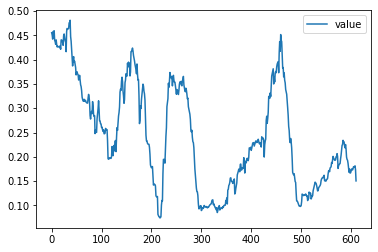

In [63]:
results.plot( y="value" )